In [30]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [31]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

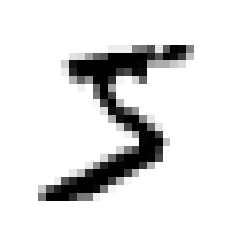

In [32]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)
plt.axis("off")
plt.show()

In [33]:
y[0]

'5'

In [34]:
y = y.astype(np.uint8)

In [35]:
#MNiST dataset은 훈련/테스트 이미지를 나눠 놓음
X_train,X_test,y_train,y_test = X[:60000],X[60000:],y[:60000],y[60000:]

## 이진 분류기 훈련
- 숫자 5만 식별
- SGDClassifier 사용

In [36]:
y_train5 = (y_train == 5)
y_test5 = (y_test ==5)

In [ ]:
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(X_train,y_train)

In [ ]:
sgd.predict([some_digit])

## 성능 측정

In [ ]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42, shuffle=True)

for train_index, test_index in skfolds.split(X_train,y_train5):
    clone_clf = clone(sgd)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train5[train_index]
    X_test_fold = X_train[test_index]
    y_test_fold = y_train5[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct/len(y_pred))